# 경사하강법(Gradient Descent)
- 미분의 해가 존재하지 않을 경우에 사용

교재 74p

$$ \frac{1}{N} \sum_{i=1}^N (y_i - y_i^h)^2 = \frac{1}{N} \sum_{i=1}^N (y_i - (ax_i + b))^2 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

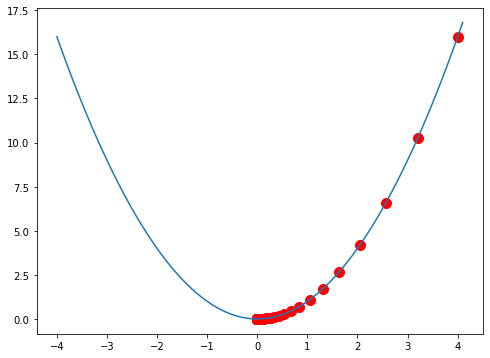

In [2]:
x_ = np.arange(-4, 4.2, 0.1)
# print(x_)

y_ = x_**2

x = 4
y = 16
lr = 0.1

plt.figure(figsize = (8, 6))
plt.plot(x_, y_)

# plt.scatter(4, 16, s = 200, c = 'red')

for _ in range(1000):
    plt.scatter(x, y, c = 'red', s = 100)
    dy_dx = 2*x
    x = x - lr*dy_dx                                # lr 크기만큼 x 방향으로 움직인다.
    y = x**2

plt.show()

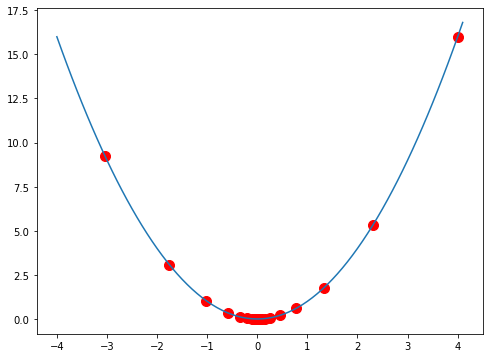

In [3]:
x_ = np.arange(-4, 4.2, 0.1)
# print(x_)

y_ = x_**2

x = 4
y = 16
lr = 0.88

plt.figure(figsize = (8, 6))
plt.plot(x_, y_)

# plt.scatter(4, 16, s = 200, c = 'red')

for _ in range(100):
    plt.scatter(x, y, c = 'red', s = 100)
    dy_dx = 2*x
    x = x - lr*dy_dx                                # lr 크기가 너무 크면 최하점을 지나쳐 위로 치솟아 버린다.
    y = x**2

plt.show()

In [4]:
import pandas as pd

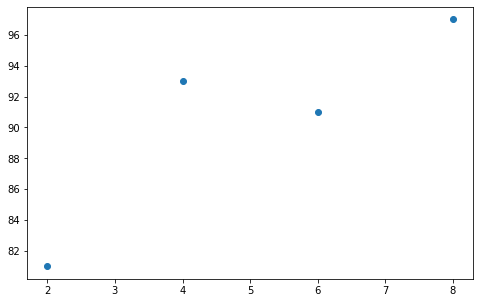

epoch = 0, 기울기 = 27.8400, 절편 = 5.4300
epoch = 100, 기울기 = 7.0739, 절편 = 50.5117
epoch = 200, 기울기 = 4.0960, 절편 = 68.2822
epoch = 300, 기울기 = 2.9757, 절편 = 74.9678
epoch = 400, 기울기 = 2.5542, 절편 = 77.4830
epoch = 500, 기울기 = 2.3956, 절편 = 78.4293
epoch = 600, 기울기 = 2.3360, 절편 = 78.7853
epoch = 700, 기울기 = 2.3135, 절편 = 78.9192
epoch = 800, 기울기 = 2.3051, 절편 = 78.9696
epoch = 900, 기울기 = 2.3019, 절편 = 78.9886
epoch = 1000, 기울기 = 2.3007, 절편 = 78.9957
epoch = 1100, 기울기 = 2.3003, 절편 = 78.9984
epoch = 1200, 기울기 = 2.3001, 절편 = 78.9994
epoch = 1300, 기울기 = 2.3000, 절편 = 78.9998
epoch = 1400, 기울기 = 2.3000, 절편 = 78.9999
epoch = 1500, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1600, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1700, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1800, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1900, 기울기 = 2.3000, 절편 = 79.0000
epoch = 2000, 기울기 = 2.3000, 절편 = 79.0000


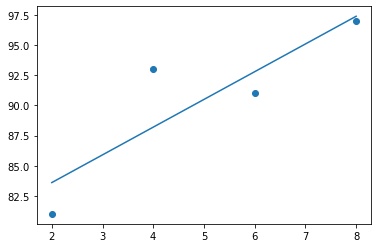

In [5]:
data = [[2, 81], [4, 93], [6, 91], [8, 97]]

x = [i[0] for i in data]
y = [i[1] for i in data]

plt.figure(figsize = (8, 5))
plt.scatter(x, y)
plt.show()

x_data = np.array(x)
y_data = np.array(y)

a = 0
b = 0

lr = 0.03

epochs = 2001

for i in range(epochs):
    y_pred = a * x_data + b                                  # 예측값 = y_i^h
    error = y_data - y_pred
    
    a_diff = -(2 / len(x_data)) * sum(x_data * error)       # a에 대한 편미분
    b_diff = -(2 / len(x_data)) * sum(error)                # b에 대한 편미분
    
    a = a - lr * a_diff
    b = b - lr * b_diff
    
    if i % 100 ==0:
        print('epoch = %.f, 기울기 = %.04f, 절편 = %.04f' % (i, a, b))             # %.04f는 소수점 4번째 자리까지 나오는 것
        
y_pred = a * x_data + b
plt.scatter(x,y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

# 로지스틱 회귀(LG) = 시그모이드 함수(Sigmoid function)

히든 게이트에 시그모이드 함수가 들어가면 [Vanishing Gradient(기울기 소멸 문제)](https://smartstuartkim.wordpress.com/2019/02/09/vanishing-gradient-problem/)가 발생한다.

교재 88p

시그모이드 함수 => $ \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + ... + \beta_pX_p)}} = \frac{1}{1 + e^{-z}}$

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m {(y_ilog(h_\theta(x_i)) + (1 -y_i)log(1 -h_\theta(x_i)))} $$

$ y_i $ 는 또는 1의 값을 가지며 (예) 암일 경우 악성, 양성의 판단을, 신용의 경우 불량자인지 아닌지를 결정해주는 정의

다시 말해 $ y_i $의 값이 0 또는 1로 결정되는 순간 $ J $에 대입되며 

악성(1)일 경우, 암이 악성일 확률을.

양성(0)일 경우, 암이 악성이 아닐 경우의 확률을 나타낸다.

$$ h_\theta(x_i) = \frac{1}{1 + e^{-(ax + b)}} $$

시그모이드 함수로서 0부터 1 사이의 값을 가지며 확률이라고 정의할 수 있다.

[ 2  4  6  8 10 12 14]
[0 0 0 1 1 1 1]


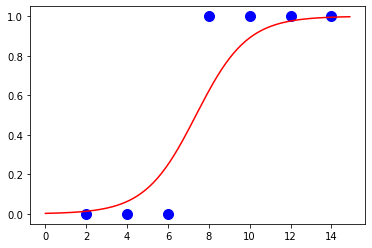

In [6]:
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = np.array(data)[:, 0]
y_data = np.array(data)[:, 1]

print(x_data)
print(y_data)

x = np.arange(0, 15, 0.1)
y = 1 / (1 + np.e**(-(.8*x - 5.9)))

plt.scatter(x_data, y_data, s = 100, c ='blue')
plt.plot(x, y, c = 'red')
plt.show()

epoch = 0, 기울기 = -0.0500, 절편 = -0.0250
epoch = 0, 기울기 = -0.1388, 절편 = -0.0472
epoch = 0, 기울기 = -0.2268, 절편 = -0.0619
epoch = 0, 기울기 = 0.1201, 절편 = -0.0185
epoch = 0, 기울기 = 0.2374, 절편 = -0.0068
epoch = 0, 기울기 = 0.2705, 절편 = -0.0040
epoch = 0, 기울기 = 0.2860, 절편 = -0.0029
epoch = 1000, 기울기 = 1.4978, 절편 = -9.9401
epoch = 1000, 기울기 = 1.4940, 절편 = -9.9411
epoch = 1000, 기울기 = 1.4120, 절편 = -9.9547
epoch = 1000, 기울기 = 1.4949, 절편 = -9.9444
epoch = 1000, 기울기 = 1.4982, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4984, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4985, 절편 = -9.9440
epoch = 2000, 기울기 = 1.9065, 절편 = -12.9489
epoch = 2000, 기울기 = 1.9055, 절편 = -12.9491
epoch = 2000, 기울기 = 1.8515, 절편 = -12.9581
epoch = 2000, 기울기 = 1.9057, 절편 = -12.9514
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513


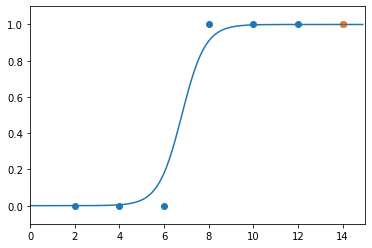

In [16]:
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

a = 0
b = 0

lr = 0.05

def sigmoid(x):
    return 1 / (1 + np.e**(-x))

for i in range(2001):
    for x_data, y_data in data:
        a_diff = x_data*(sigmoid(a * x_data + b) - y_data)                # a에 대해 편미분
        b_diff = sigmoid(a * x_data + b) - y_data                         # y에 대해 편미분
        
        a = a - lr * a_diff
        b = b - lr * b_diff
        
        if i % 1000 == 0:
            print('epoch = %.f, 기울기 = %.04f, 절편 = %.04f' % (i,a, b))
            
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1))
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a * x + b) for x in x_range]))
plt.show()

여기서 알아둬야 할 것은 a와 b에 대해 편미분 했을 경우의 식.

$$ \frac{d}{da} J(\theta) = (x의 값) (\frac{1}{1 + e^{-(ax + b)}}) - y의 값 $$

$$ \frac{d}{dy} J(\theta) = \frac{1}{1 + e^{-(ax + b)}} - y의 값 $$

이렇게 편미분을 진행하여 나온 값에 학습률(learning rate)을 곱하여 기존의 값(a, b)에서 빼면 우리가 찾는 a와 b의 값이 나온다.

$$ 학습률(\gamma) => x - \gamma\frac{dy}{dx} $$

# 퍼셉트론으로 XOR 문제 해결

In [17]:
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])

b1 = 3
b2 = -1
b3  = -1

In [23]:
ai = np.array([-2, -2]) * np.array([1, 0])
print(ai)

[-2  0]


파이썬에서는 행렬의 곱이 다르다.

ex) [-2, 2] * [1, 2] = [-2, 4]

In [18]:
## 퍼셉트론 함수

def MLP(x, w, b):
    y = np.sum(x * w) + b
    
    if y >= 1:
        return 1
    else:
        return 0

In [19]:
## n2에 대한 결과 (교재 110 ~ 111p)

def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

## n1에 대한 결과 

def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

## y_out에 대한 결과

def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

##  우리가 원하는 값(XOR)에 대한 결과

def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))



for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print('입력값 = ', str(x), '출력값 = ', str(y))


입력값 =  (0, 0) 출력값 =  0
입력값 =  (1, 0) 출력값 =  1
입력값 =  (0, 1) 출력값 =  1
입력값 =  (1, 1) 출력값 =  0


XOR(0, 1, 1, 0)을 만들기 위해 NAND(1, 1, 1, 0)과 OR(1, 1, 1, 0)을 AND(0, 0, 0, 1) - {둘 다 1인 경우에만 1을 출력}를 사용하여 만든 것.